In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv("Ads_CTR_Optimisation.csv")
Data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


**Implementing UCB**

In [ ]:
import math
# Step 1
N = 10000        # No. of Users
d = 10       # for ads
ads_selected = []
# No. of times ad i was selected up to round n
numbers_of_selections = [0] * d
# sum of rewards of the ad i up to round n
sum_of_rewards = [0] * d
Total_rewards = 0

# For each customer we will be following Step 2
for i in range(0,2):
  # Select an ad that has max UCB
  ad = 0
  max_upper_bound = 0
  # Compare UCB for each round and then decide, for that needs another loop
  # Loop for round/ads
  for j in range(0,2):
    print(numbers_of_selections[j])
    if numbers_of_selections[j] > 0:
      average_reward = sum_of_rewards[j] / numbers_of_selections[j]
      delta_i = math.sqrt(3/2 * math.log(i + 1) / numbers_of_selections[j])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400     # setting higher upper confidence bound
    # Select max upper bound
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = j
  ads_selected.append(ad)
  # numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  numbers_of_selections[ad] += 1
  reward = Data.values[i, ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] +  reward
  Total_rewards = Total_rewards + reward

0
0
1
0


**Visualising the results**

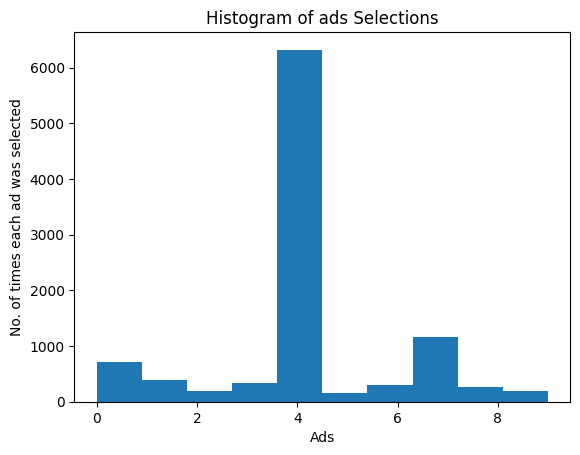

In [ ]:
plt.hist(ads_selected)
plt.title("Histogram of ads Selections")
plt.xlabel("Ads")
plt.ylabel("No. of times each ad was selected")
plt.show()